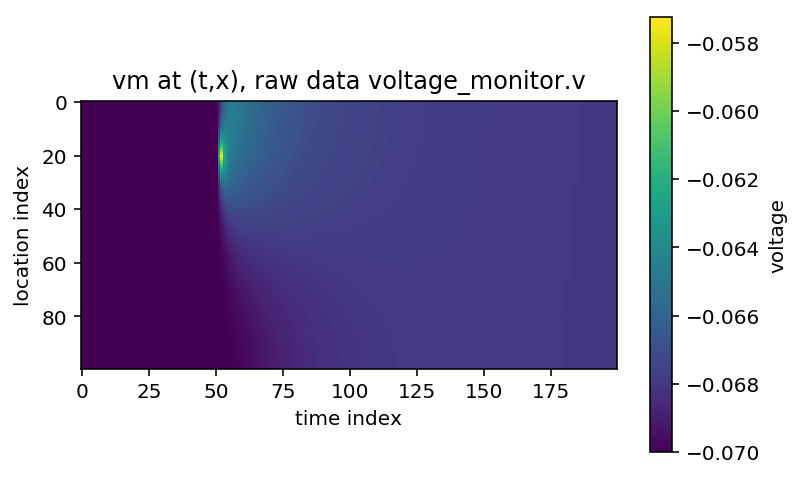

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import brian2 as b2
import matplotlib.pyplot as plt
from neurodynex.cable_equation import passive_cable
from neurodynex.tools import input_factory
passive_cable.getting_started()

In [4]:
from neurodynex.cable_equation import passive_cable
print(passive_cable.R_TRANSVERSAL)

1.25 m^4 kg s^-3 A^-2


# Question 5.1: Simulate a passive cable

In [99]:
input_current = input_factory.get_step_current(10, 10, .1*b2.ms, .8*b2.nA, True)

In [100]:
voltage_monitor, cable_model = passive_cable.simulate_passive_cable(length=800*b2.umetre, 
                                     current_injection_location=[200 * b2.umetre],
                                     input_current=input_current,
                                     simulation_time=3 * b2.ms)

Text(0, 0.5, 'Voltage')

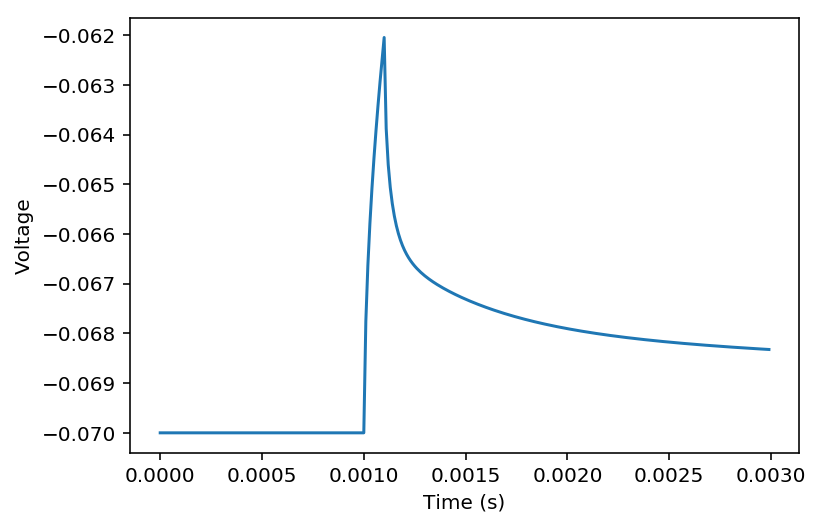

In [101]:
#voltage_monitor.v.shape
import numpy as np
probe_location = .200 * b2.mm
plt.plot(voltage_monitor.t, voltage_monitor[cable_model.morphology[probe_location]].v)
plt.xlabel('Time (s)')
plt.ylabel('Voltage')

The maximum depolariation is at 200 um, and is ~ .08 mV. It's after 1.1 ms.

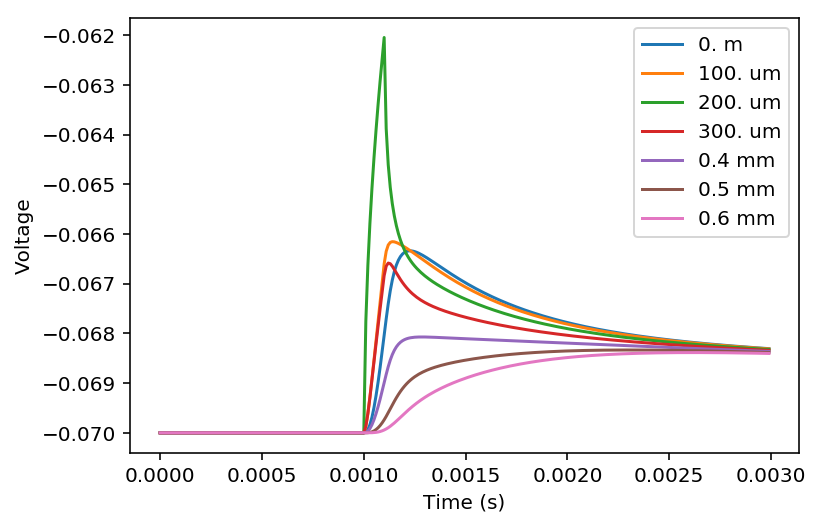

In [102]:
#voltage_monitor.v.shape
import numpy as np
probe_locations = [x * .1 * b2.mm for x in range(7)]
for probe_location in probe_locations:
    plt.plot(voltage_monitor.t, voltage_monitor[cable_model.morphology[probe_location]].v)
    plt.xlabel('Time (s)')
    plt.ylabel('Voltage')
    
plt.legend(tuple(str(x) for x in probe_locations))

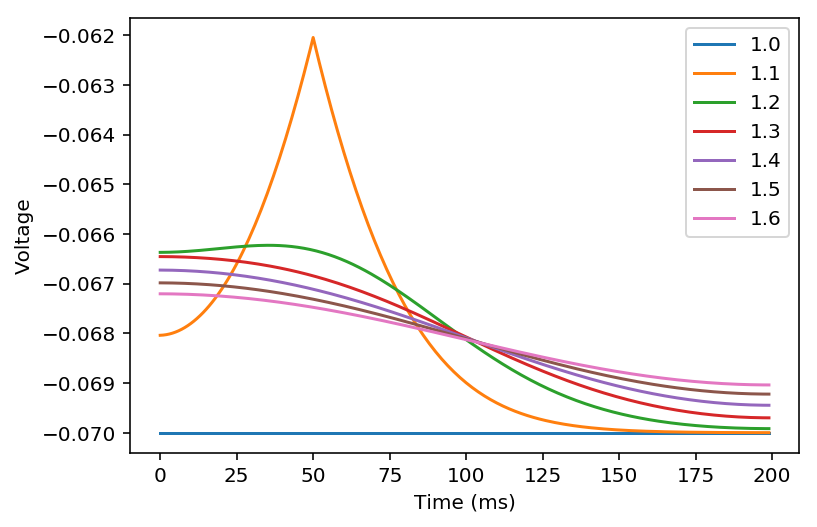

In [103]:
#voltage_monitor.v.shape
import numpy as np

vs = [voltage_monitor.v[:, abs(voltage_monitor.t - x / 10.0 * b2.ms) < .001 * b2.ms] for x in range(10, 17)]
xs = np.arange(cable_model.morphology.n)
for v in vs:
    plt.plot(xs, v)

plt.xlabel('Time (ms)')
plt.ylabel('Voltage')

plt.legend(np.arange(10, 17) / 10.0)

The current creates a rapid deformation in the voltage profile that smooths out over time.

# Question 5.2

Coincident spikes or no spikes.

In [105]:
t_spikes = [10, 15, 20]
l_spikes = [100. * b2.um, 200. * b2.um, 300. * b2.um]
current = input_factory.get_spikes_current(t_spikes, 100*b2.us, 0.8*b2.namp, append_zero=True)
voltage_monitor_ABC, cable_model = passive_cable.simulate_passive_cable(current_injection_location=l_spikes, 
                                                                        input_current=current, length=800*b2.umetre, 
                                                                        simulation_time=5 * b2.ms)

WARNING    Group uses a dt of 10. us while TimedArray uses dt of 100. us [brian2.input.timedarray]


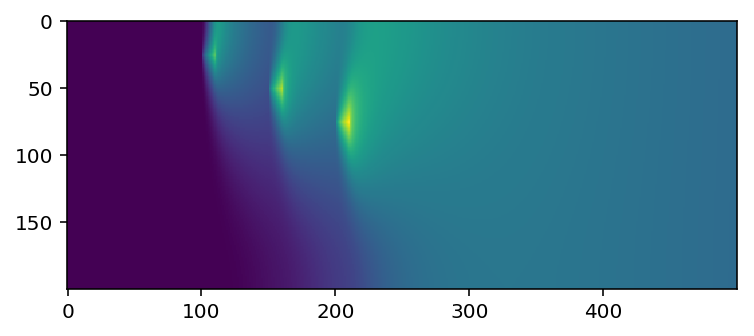

In [113]:
plt.imshow(voltage_monitor_ABC.v / b2.mV)

Text(0, 0.5, 'Voltage (V)')

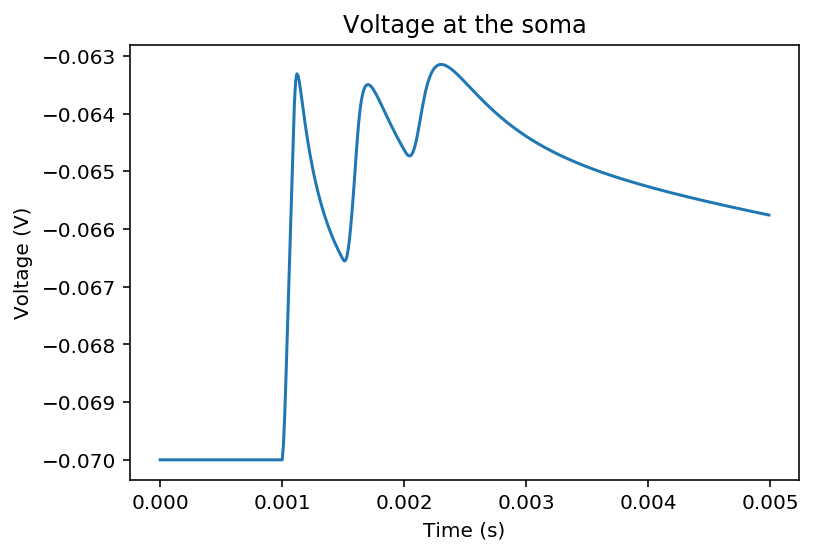

In [120]:
plt.plot(voltage_monitor_ABC.t, voltage_monitor_ABC.v[0])
plt.title('Voltage at the soma')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')

In [121]:
t_spikes = [10, 15, 20]
l_spikes = [100. * b2.um, 200. * b2.um, 300. * b2.um][::-1]
current = input_factory.get_spikes_current(t_spikes, 100*b2.us, 0.8*b2.namp, append_zero=True)
voltage_monitor_ABC, cable_model = passive_cable.simulate_passive_cable(current_injection_location=l_spikes, 
                                                                        input_current=current, length=800*b2.umetre, 
                                                                        simulation_time=5 * b2.ms)

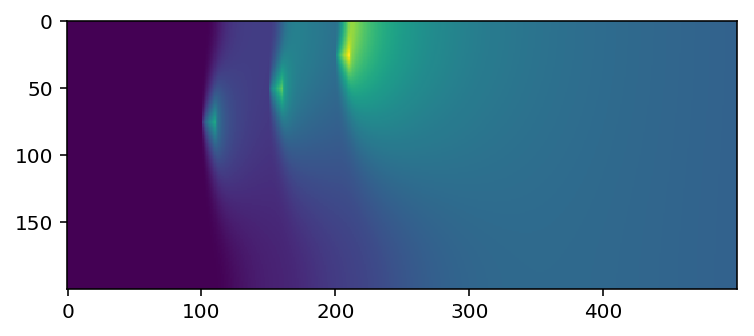

In [122]:
plt.imshow(voltage_monitor_ABC.v / b2.mV)

Text(0, 0.5, 'Voltage (V)')

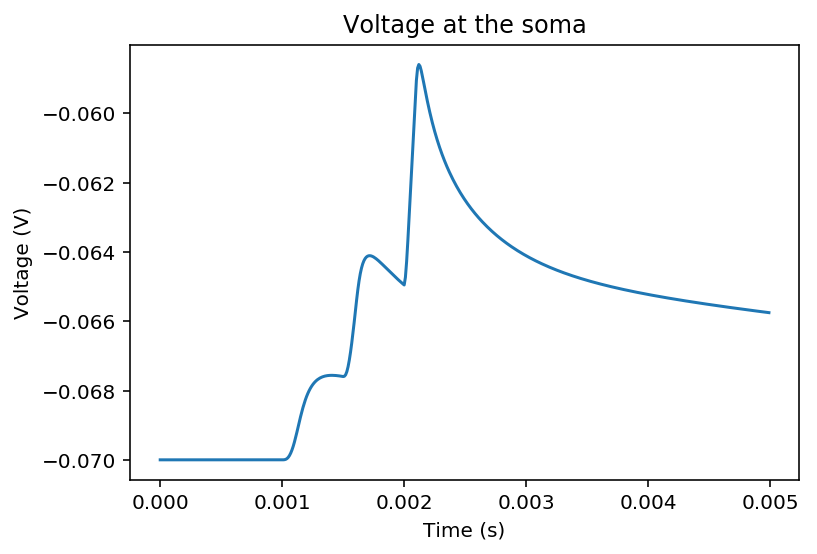

In [123]:
plt.plot(voltage_monitor_ABC.t, voltage_monitor_ABC.v[0])
plt.title('Voltage at the soma')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')

Three spikes well-timed (towards the soma) work much better than the opposite (away the soma). The charge moves away from the injection site, such that spikes coming from "further away" reach the soma later. For two spikes, we can compute the coincidence bonus depending on delay. Let's set the closest synapse to spike at 2.5 ms, and measure the influence of the input for a range of deltas in the far away synapse. 

In [126]:
ts = np.arange(50)
v_max = []

for t in ts:
    print(t)
    t_spikes = [25, t]
    l_spikes = [100. * b2.um, 200. * b2.um]
    current = input_factory.get_spikes_current(t_spikes, 100*b2.us, 0.8*b2.namp, append_zero=True)
    voltage_monitor_ABC, cable_model = passive_cable.simulate_passive_cable(current_injection_location=l_spikes, 
                                                                            input_current=current, length=800*b2.umetre, 
                                                                            simulation_time=5 * b2.ms)
    v_max.append(voltage_monitor_ABC.v[0].max())

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


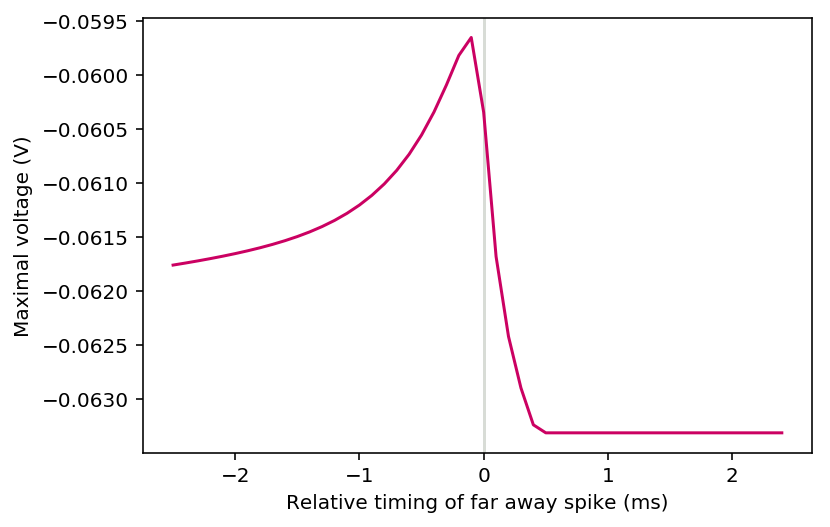

In [156]:
plt.axvline(0, color='xkcd:light grey')
plt.plot(ts / 10 - 2.5, np.array(v_max), color='xkcd:deep pink')
plt.xlabel('Relative timing of far away spike (ms)')
_ = plt.ylabel('Maximal voltage (V)')

Timing is important but the far away spike but simultaneous spiking is almost as good - the delay is very small, so it doesn't take much to cancel. 

# Cable parameters

In [157]:
import pandas as pd

In [171]:
# set 1: (same as defaults)
input_current = input_factory.get_step_current(0, 0, .05*b2.ms, .8*b2.nA, True)
membrane_resistance_1 = 1.25 * b2.Mohm * b2.mm ** 2
membrane_capacitance_1 = 0.8 * b2.uF / b2.cm ** 2

b2.defaultclock.dt = 0.005 * b2.ms

voltage_monitor_1, cable_model = passive_cable.simulate_passive_cable(length=800*b2.umetre, 
                                     current_injection_location=[400 * b2.umetre],
                                     input_current=input_current,
                                     simulation_time=.2 * b2.ms, 
                                     capacitance=membrane_capacitance_1, 
                                     r_transversal=membrane_resistance_1)

Text(0.5, 0, 'Time (ms)')

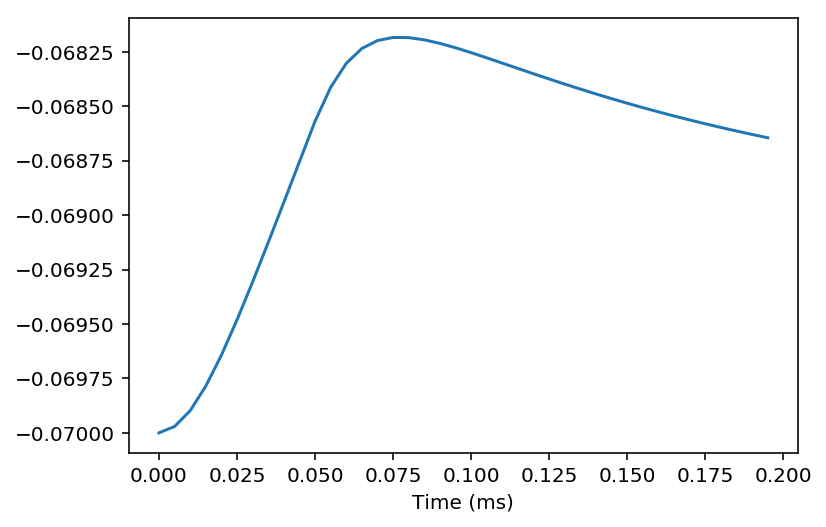

In [172]:
v1 = voltage_monitor_1[cable_model.morphology[.5 * b2.mm]].v
plt.plot(voltage_monitor.t / b2.ms, v1)
plt.xlabel('Time (ms)')

In [176]:
membrane_resistance_2 = 5.0 * b2.Mohm * b2.mm ** 2
membrane_capacitance_2 = 0.2 * b2.uF / b2.cm ** 2

voltage_monitor_2, cable_model = passive_cable.simulate_passive_cable(length=800*b2.umetre, 
                                     current_injection_location=[400 * b2.umetre],
                                     input_current=input_current,
                                     simulation_time=.2 * b2.ms, 
                                     capacitance=membrane_capacitance_2, 
                                     r_transversal=membrane_resistance_2)

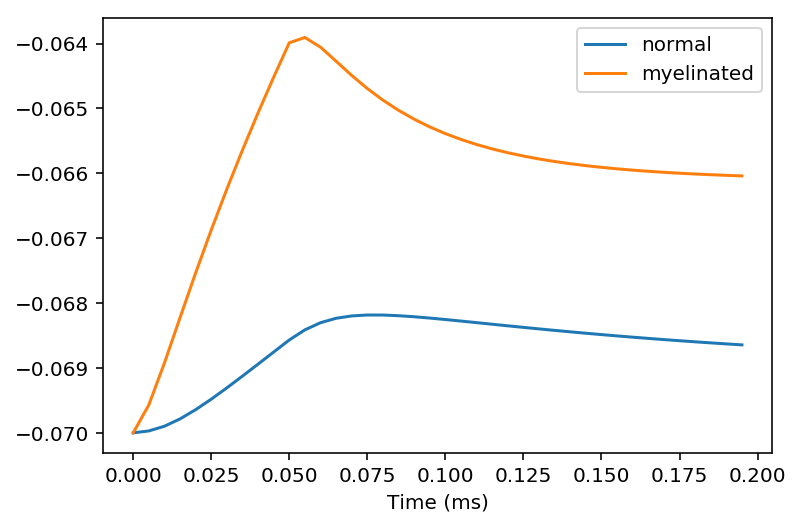

In [180]:
plt.plot(voltage_monitor.t / b2.ms, v1)

v2 = voltage_monitor_2[cable_model.morphology[.5 * b2.mm]].v
plt.plot(voltage_monitor.t / b2.ms, v2)
plt.xlabel('Time (ms)')

plt.legend(('normal', 'myelinated'))

At higher resistance and lower capacitance, transmission is more efficaceous (more change in voltage per EPSP) and faster.

# Question 5.4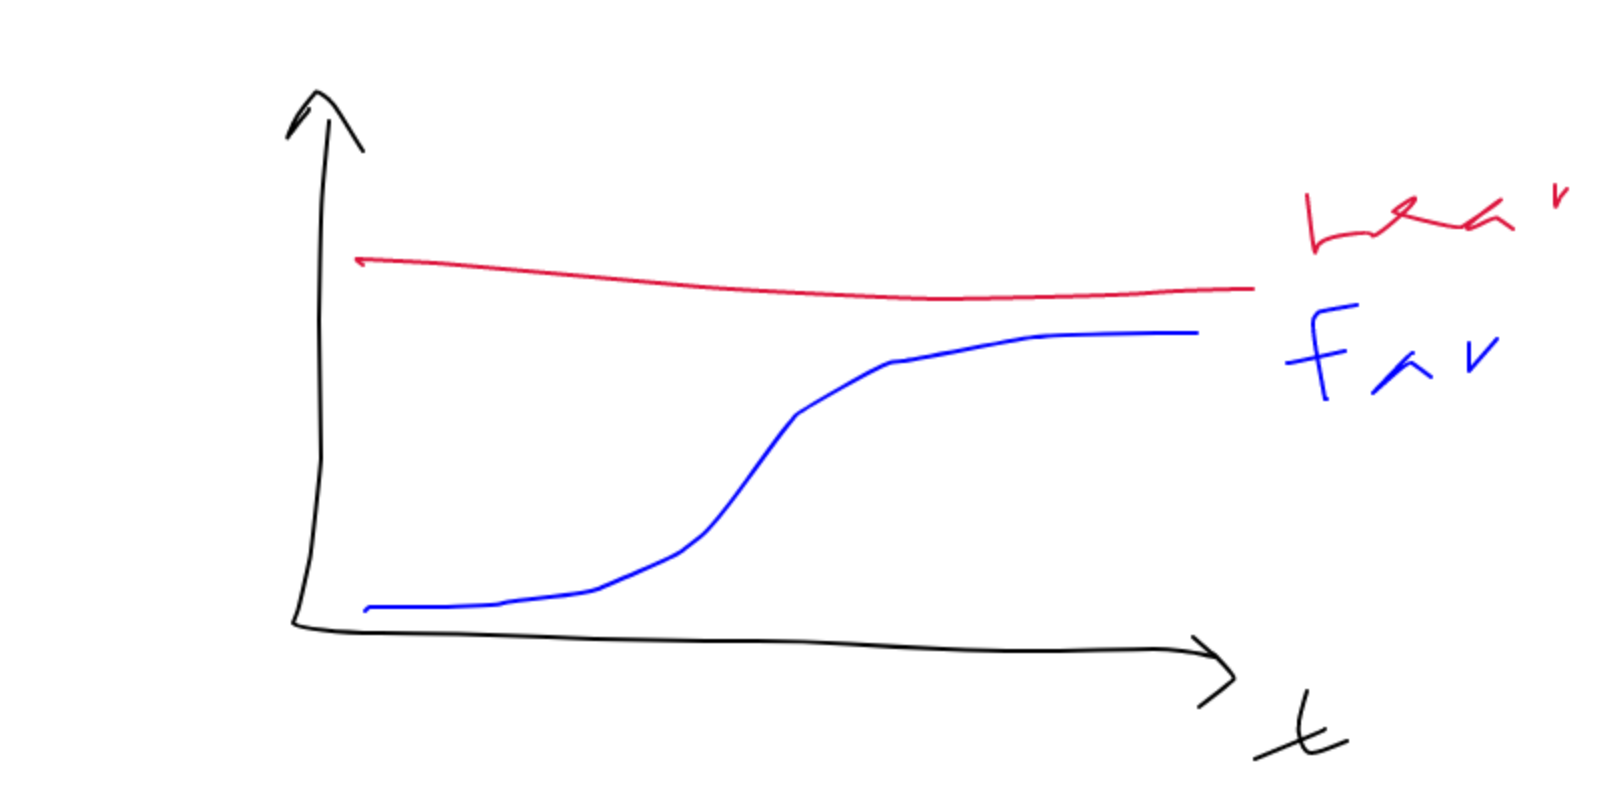

In [239]:
#passive_cable.CABLE_DIAMETER

0.35355339 * mmetre

In [324]:
b2.defaultclock.dt = 0.1 * b2.ms
input_current = input_factory.get_step_current(10, 10, b2.ms, .8*b2.nA, False)

voltage_monitor, cable_model = passive_cable.simulate_passive_cable(length=1000*b2.umetre, 
                                     current_injection_location=[0 * b2.umetre],
                                     input_current=input_current,
                                     simulation_time=100.0 * b2.ms, 
                                     capacitance=membrane_capacitance_1, 
                                     diameter=.1 * b2.um)

v_X0 = voltage_monitor.v[0,:]  # access the first compartment
v_Xend = voltage_monitor.v[-1,:]  # access the last compartment
v_Tend = voltage_monitor.v[:, -1]  # access the last time step

Text(0.5, 0, 'Time (ms)')

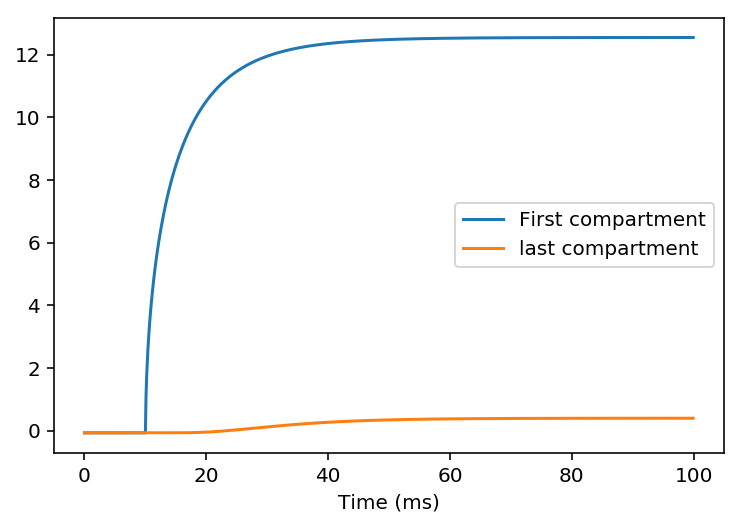

In [325]:
plt.plot(voltage_monitor.t / b2.ms, v_X0)
plt.plot(voltage_monitor.t / b2.ms, v_Xend)
plt.legend(('First compartment', 'last compartment'))
plt.xlabel('Time (ms)')

Text(0.5, 0, 'Distance from end (um)')

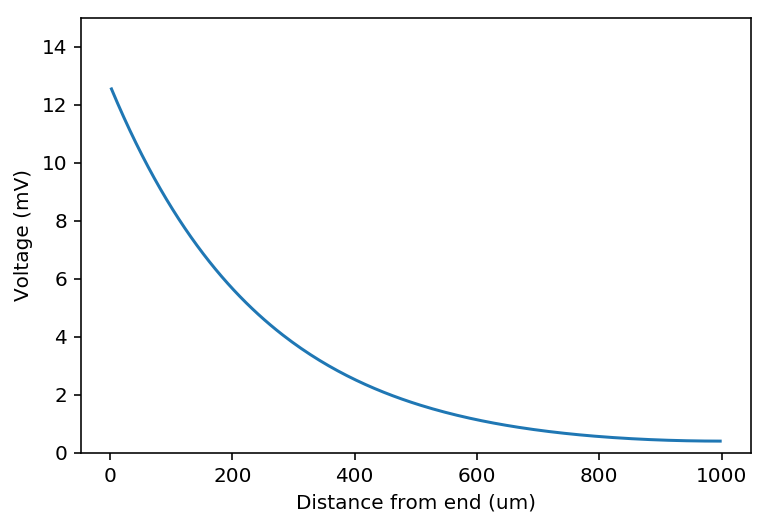

In [326]:
plt.plot(cable_model.morphology.distance / b2.um, v_Tend)
plt.ylim((0, 15))
plt.ylabel('Voltage (mV)')
plt.xlabel('Distance from end (um)')

In [327]:
cable_model.morphology.distance[abs(v_Tend.max() * np.exp(-1) - v_Tend).argmin()]

252.5 * umetre

In [330]:
np.sqrt(passive_cable.R_TRANSVERSAL * .1 * b2.um / passive_cable.R_LONGITUDINAL / 4)

250. * umetre